In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# input the dataset
df = pd.read_csv('/content/data.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
df = df.copy()

**Data exploration & preparation**

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# the number of rows (observations) and columns (features)
df.shape

(4600, 18)

In [ ]:
# to see the features' datatypes and
# to make sure the datatypes are what we expect. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
# change the dtype of floors and bathrooms to 'int'
df[['floors', 'bathrooms', 'bedrooms']] = \
    df[['floors', 'bathrooms', 'bedrooms']].astype('int')
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
# some statistical values to see how data are distributed (numerical features)
pd.set_option('display.float_format', lambda x: format(x, '.4f'))
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000
mean,551962.9885,3.4009,1.7889,2139.3470,14852.5161,1.4591,0.0072,0.2407,3.4517,1827.2654,312.0815,1970.7863,808.6083
std,563834.7025,0.9088,0.7522,963.2069,35884.4361,0.5522,0.0844,0.7784,0.6772,862.1690,464.1372,29.7318,979.4145
min,0.0000,0.0000,0.0000,370.0000,638.0000,1.0000,0.0000,0.0000,1.0000,370.0000,0.0000,1900.0000,0.0000
25%,322875.0000,3.0000,1.0000,1460.0000,5000.7500,1.0000,0.0000,0.0000,3.0000,1190.0000,0.0000,1951.0000,0.0000
50%,460943.4615,3.0000,2.0000,1980.0000,7683.0000,1.0000,0.0000,0.0000,3.0000,1590.0000,0.0000,1976.0000,0.0000
75%,654962.5000,4.0000,2.0000,2620.0000,11001.2500,2.0000,0.0000,0.0000,4.0000,2300.0000,610.0000,1997.0000,1999.0000
max,26590000.0000,9.0000,8.0000,13540.0000,1074218.0000,3.0000,1.0000,4.0000,5.0000,9410.0000,4820.0000,2014.0000,2014.0000


In [ ]:
# observe the number of rows where the price is 0
(df['price']==0).sum()

49

In [ ]:
df[df['price']==0].shape

(49, 18)

In [ ]:
# replace 0s with NaN
df['price'].replace(0, np.nan, inplace=True)

In [ ]:
df[df['price']==0].shape

(0, 18)

In [ ]:
df.isnull().sum()

date              0
price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [ ]:
# replace the NaN values of price feature with its mean value
df['price'].fillna(value=df['price'].mean(), inplace=True)
df.isnull().sum().sum()

0

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000,4600.0000
mean,557905.8991,3.4009,1.7889,2139.3470,14852.5161,1.4591,0.0072,0.2407,3.4517,1827.2654,312.0815,1970.7863,808.6083
std,560917.6337,0.9088,0.7522,963.2069,35884.4361,0.5522,0.0844,0.7784,0.6772,862.1690,464.1372,29.7318,979.4145
min,7800.0000,0.0000,0.0000,370.0000,638.0000,1.0000,0.0000,0.0000,1.0000,370.0000,0.0000,1900.0000,0.0000
25%,328158.9286,3.0000,1.0000,1460.0000,5000.7500,1.0000,0.0000,0.0000,3.0000,1190.0000,0.0000,1951.0000,0.0000
50%,468750.0000,3.0000,2.0000,1980.0000,7683.0000,1.0000,0.0000,0.0000,3.0000,1590.0000,0.0000,1976.0000,0.0000
75%,654962.5000,4.0000,2.0000,2620.0000,11001.2500,2.0000,0.0000,0.0000,4.0000,2300.0000,610.0000,1997.0000,1999.0000
max,26590000.0000,9.0000,8.0000,13540.0000,1074218.0000,3.0000,1.0000,4.0000,5.0000,9410.0000,4820.0000,2014.0000,2014.0000


In [ ]:
# drop insignificant features
df.drop(['street', 'statezip', 'date', 'country'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,Seattle
2,342000.0000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent
3,420000.0000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond


In [ ]:
# Change city names to numerric vlaues starting from 0 
df['city'], _ = pd.factorize(df['city'])

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,0
1,2384000.0000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,1
2,342000.0000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,2
3,420000.0000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,3
4,550000.0000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,4


In [ ]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
price,1.0000,0.2081,0.3267,0.4398,0.0512,0.1376,0.1431,0.2373,0.0386,0.3752,0.2156,0.0217,-0.0289,-0.0290
bedrooms,0.2081,1.0000,0.4985,0.5949,0.0688,0.1574,-0.0035,0.1110,0.0251,0.4847,0.3342,0.1425,-0.0611,0.0901
bathrooms,0.3267,0.4985,1.0000,0.7113,0.1095,0.4637,0.0718,0.2034,-0.1188,0.6491,0.2703,0.3945,-0.1860,0.0607
sqft_living,0.4398,0.5949,0.7113,1.0000,0.2105,0.3410,0.1176,0.3110,-0.0628,0.8764,0.4472,0.2878,-0.1228,0.1347
sqft_lot,0.0512,0.0688,0.1095,0.2105,1.0000,-0.0051,0.0172,0.0739,0.0006,0.2165,0.0348,0.0507,-0.0227,0.1976
floors,0.1376,0.1574,0.4637,0.3410,-0.0051,1.0000,0.0180,0.0211,-0.3065,0.5173,-0.2533,0.5622,-0.2472,0.0236
waterfront,0.1431,-0.0035,0.0718,0.1176,0.0172,0.0180,1.0000,0.3609,0.0004,0.0789,0.0975,-0.0236,0.0086,0.0821
view,0.2373,0.1110,0.2034,0.3110,0.0739,0.0211,0.3609,1.0000,0.0631,0.1743,0.3216,-0.0645,0.0230,0.0195
condition,0.0386,0.0251,-0.1188,-0.0628,0.0006,-0.3065,0.0004,0.0631,1.0000,-0.1782,0.2006,-0.3997,-0.1868,-0.0339
sqft_above,0.3752,0.4847,0.6491,0.8764,0.2165,0.5173,0.0789,0.1743,-0.1782,1.0000,-0.0387,0.4085,-0.1604,0.1897


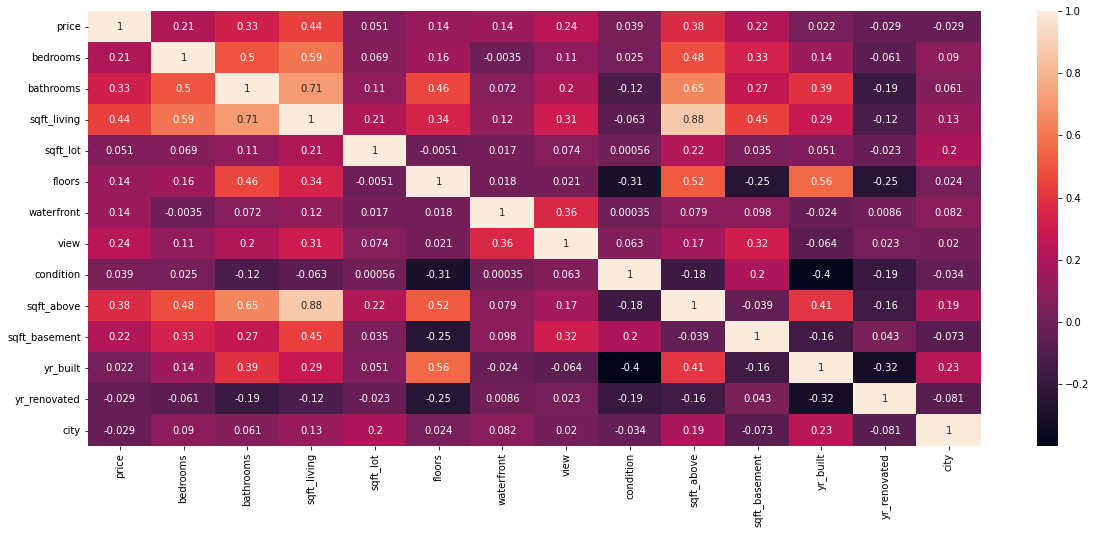

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True)

In [ ]:
X = df.copy()
y = df['price']

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def get_mi_score(X, y):
    mi = mutual_info_regression(X, y, random_state=10)
    mi = pd.Series(mi, index=X.columns).sort_values(ascending=False)
    return mi

In [ ]:
# display Mutual Information scores of the features
mi_score = get_mi_score(X, y)
mi_score   

price           6.2804
sqft_living     0.3350
city            0.3000
sqft_above      0.2393
bathrooms       0.1598
sqft_lot        0.0838
bedrooms        0.0838
yr_built        0.0677
sqft_basement   0.0553
view            0.0522
floors          0.0468
waterfront      0.0000
condition       0.0000
yr_renovated    0.0000
dtype: float64

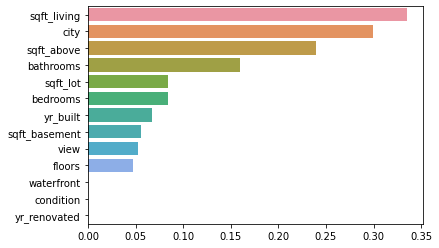

In [ ]:
sns.barplot(y=mi_score.index[1:], x=mi_score[1:])

In [ ]:
X.drop(['yr_renovated', 'condition', 'waterfront'], axis=1, inplace=True)

In [ ]:
X.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,city
0,313000.0000,3,1,1340,7912,1,0,1340,0,1955,0
1,2384000.0000,5,2,3650,9050,2,4,3370,280,1921,1
2,342000.0000,3,2,1930,11947,1,0,1930,0,1966,2
3,420000.0000,3,2,2000,8030,1,0,1000,1000,1963,3
4,550000.0000,4,2,1940,10500,1,0,1140,800,1976,4


**Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


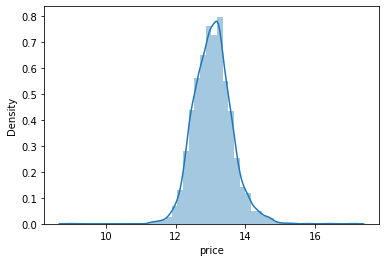

In [ ]:
# how price is distributed
sns.distplot(np.log(X['price']))

In [ ]:
def draw_boxenplot(feature):
    ax = sns.boxenplot(x=df[feature], y=np.log(df['price']))
    ax.set_ylabel('price (log)')
    ax.set(title=f'{feature} VS price')

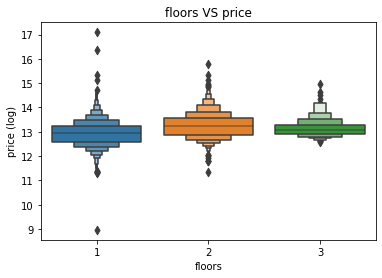

In [ ]:
# floors vs price
draw_boxenplot('floors')

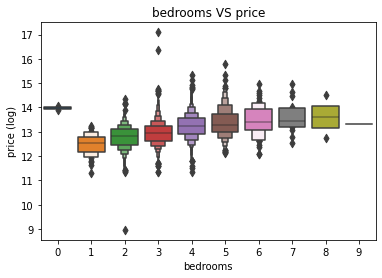

In [ ]:
# bedrooms vs price
draw_boxenplot('bedrooms')

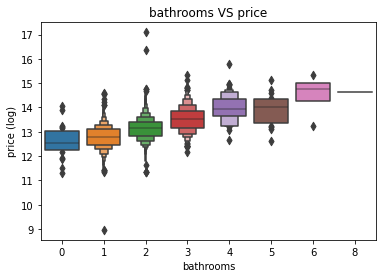

In [ ]:
# bathrooms vs price
draw_boxenplot('bathrooms')

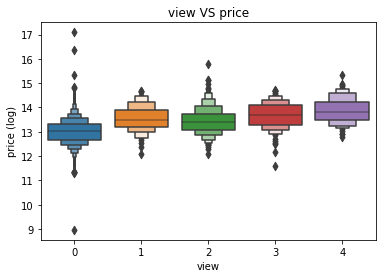

In [ ]:
# view vs price
draw_boxenplot('view')

In [ ]:
X = X.drop('price', axis=1)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,city
0,3,1,1340,7912,1,0,1340,0,1955,0
1,5,2,3650,9050,2,4,3370,280,1921,1
2,3,2,1930,11947,1,0,1930,0,1966,2
3,3,2,2000,8030,1,0,1000,1000,1963,3
4,4,2,1940,10500,1,0,1140,800,1976,4


**Modeling**

In [ ]:
# split the trian and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [ ]:
# fit the dataset to the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [ ]:
# make a prediction
y_prediction = lr.predict(X_test)

In [ ]:
# Check the accuracy of the model
model.score(X_test, y_test)

0.5602415162265826

In [ ]:
#dataset link
# https://www.kaggle.com/datasets/shree1992/housedata?select=data.csv